# Thông tin
1. MSSV: 20520465
2. Họ tên: Nguyễn Vũ Dương
3. Bài tập: 3
4. Ngày thực hiện: 14/03/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
classes = ['cat','dog']

In [ ]:
path = '/content/drive/MyDrive/CS231.M21.KHCL/Baitap/Dataset/dogscats_small/'

In [ ]:
def TinhHist(pathfile):
  img = cv2.imread(pathfile,0)
  hist = cv2.calcHist([img],[0],None,[256],[0,256])
  size = img.shape[0]*img.shape[1]
  hist = hist/size
  return hist

In [ ]:
def TinhHist_chia4(pathfile):
  img = cv2.imread(pathfile,0)
  #print(np.array_split(img,4))
  a,b,c,d = np.array_split(img,4)
  hist_a = cv2.calcHist([a],[0],None,[256],[0,256])
  size = a.shape[0]*a.shape[1]
  hist_a = hist_a/size
  hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
  size = b.shape[0]*b.shape[1]
  hist_b = hist_b/size
  hist_c = cv2.calcHist([c],[0],None,[256],[0,256])
  size = c.shape[0]*c.shape[1]
  hist_c = hist_c/size
  hist_d = cv2.calcHist([d],[0],None,[256],[0,256])
  size = d.shape[0]*d.shape[1]
  hist_d = hist_d/size
  return np.concatenate((hist_a,hist_b,hist_c,hist_d),axis=0)


In [ ]:
#Đọc data từ cái dir
def read_data(path_file):
  filenames = os.listdir(path_file)
  categories = []
  Hist_img = []
  for filename in filenames:
    category = filename.split('.')[0]
    Hist_img.append(TinhHist_chia4(path_file+filename).reshape(-1))
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
  df = pd.DataFrame({
    'filename': filenames,
    'category': categories
  })
  X = np.array(Hist_img)
  y = np.array(categories)
  return df,X,y

In [ ]:
#Hàm dự đoán nhãn
def predict_label(path_file,model):
  hist = TinhHist_chia4(path_file)
  features = hist.reshape(1,-1)
  label = model.predict(features)
  return label

In [ ]:
#Hàm thể hiện hình ảnh cho đẹp
def display_image(path , df,model = None):
  fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

  for i, ax in enumerate(axes.flat):
      path_file = path+df.filename[i]
      ax.imshow(plt.imread(path_file))
      if model is None:
        ax.set_title(classes[df.category[i]], fontsize = 12)
      else:
        label = predict_label(path_file,model)
        ax.set_title(f"True: {classes[df.category[i]]}\nPredicted: {classes[int(label)]}", fontsize = 12)
  plt.tight_layout(pad=0.5)
  plt.show()

In [ ]:
df_train,X_train,y_train = read_data(path+ 'train/')

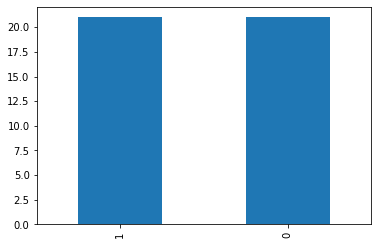

In [ ]:
#Hiển thị số lượng data từng lớp
df_train['category'].value_counts().plot.bar()

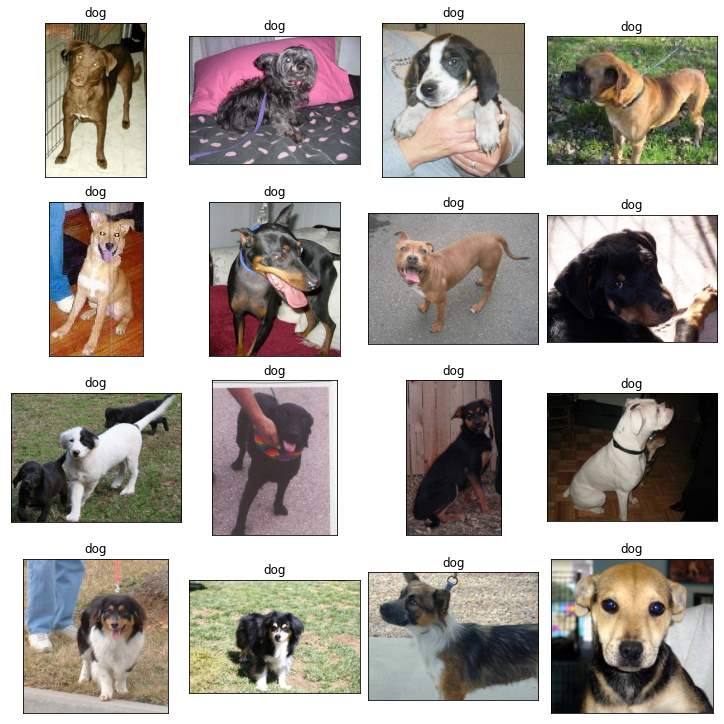

In [ ]:
#Hiển thị 1 số ảnh train
display_image(path+'train/',df_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(42, 1024)
(42,)


In [ ]:
df_test,X_test,y_test = read_data(path+'test/')

In [ ]:
print(X_test.shape)
print(y_test.shape)

(20, 1024)
(20,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
k_neighbor = list(range(1,y_train.shape[0]+1))
acc = []
knn_model = KNN(n_neighbors=1,p = 2)
knn_model.fit(X_train, y_train)
acc_check=knn_model.score(X_test, y_test)
for i in  k_neighbor:
  knn = KNN(n_neighbors=i,p = 2)
  knn.fit(X_train, y_train)
  acc.append(knn.score(X_test, y_test))
  if acc[-1]>acc_check:
    knn_model = knn
    acc_check = acc[-1]

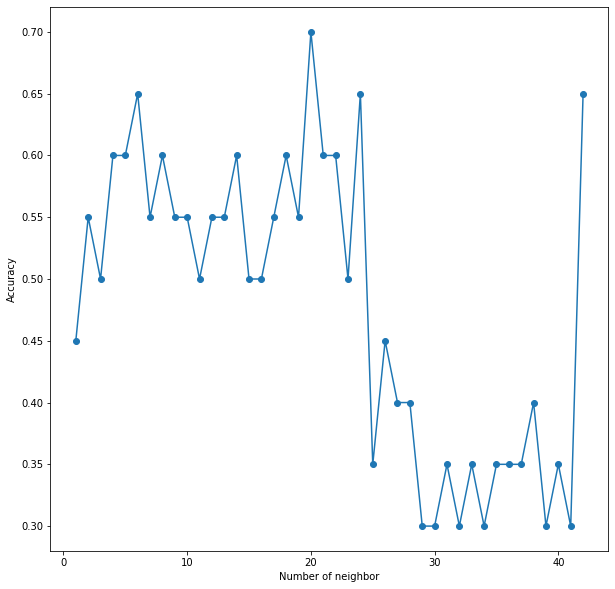

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(k_neighbor, acc, '-o')
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print(acc_check)

0.7


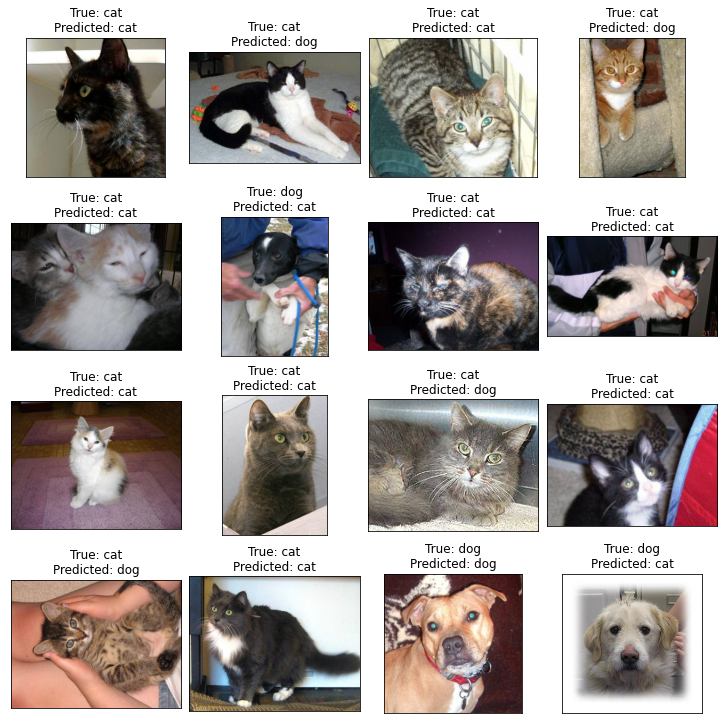

In [ ]:
display_image(path+'test/',df_test,knn_model)